In [359]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [360]:
real=pd.read_csv('data/users.csv')
real.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,0,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2/14/2015 10:54,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2/14/2015 10:54,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,2/14/2015 10:54,E13


In [361]:
fake=pd.read_csv('data/fusers.csv')
fake.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,...,DDEEF6,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2/14/2015 10:40,INT
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2/14/2015 10:40,INT
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,...,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,9999,-39600.0,NaN,NaN,NaN,2/14/2015 10:40,INT
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,...,DDEEF6,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,NaN,NaN,NaN,2/14/2015 10:40,INT
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,19800.0,NaN,NaN,NaN,2/14/2015 10:40,INT


In [362]:
dataset=pd.concat([real,fake])
dataset.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,0,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2/14/2015 10:54,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2/14/2015 10:54,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,2/14/2015 10:54,E13


In [363]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2818 entries, 0 to 1336
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  2818 non-null   int64  
 1   name                                2818 non-null   object 
 2   screen_name                         2818 non-null   object 
 3   statuses_count                      2818 non-null   int64  
 4   followers_count                     2818 non-null   int64  
 5   friends_count                       2818 non-null   int64  
 6   favourites_count                    2818 non-null   int64  
 7   listed_count                        2818 non-null   int64  
 8   created_at                          2818 non-null   object 
 9   url                                 463 non-null    object 
 10  lang                                2818 non-null   object 
 11  time_zone                           1069 non-nul

In [364]:
labels=pd.DataFrame(len(fake)*[0]+len(real)*[1])

In [365]:
labels.value_counts()

0
1    1481
0    1337
Name: count, dtype: int64

In [366]:
dataset['Fake_Profile'] = labels

Exploratory Data Analysis

In [367]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2818 entries, 0 to 1336
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  2818 non-null   int64  
 1   name                                2818 non-null   object 
 2   screen_name                         2818 non-null   object 
 3   statuses_count                      2818 non-null   int64  
 4   followers_count                     2818 non-null   int64  
 5   friends_count                       2818 non-null   int64  
 6   favourites_count                    2818 non-null   int64  
 7   listed_count                        2818 non-null   int64  
 8   created_at                          2818 non-null   object 
 9   url                                 463 non-null    object 
 10  lang                                2818 non-null   object 
 11  time_zone                           1069 non-nul

In [368]:
dataset.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,Fake_Profile
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,E13,0
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,E13,0
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2/14/2015 10:54,E13,0
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2/14/2015 10:54,E13,0
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,2/14/2015 10:54,E13,0


In [369]:
import gender_guesser.detector as gender

sex_predictor = gender.Detector(case_sensitive=False)

name = list(dataset['name'])
sex = []
for i in name:
    first_name = i.split(' ')[0]
    sex.append(sex_predictor.get_gender(first_name))

dataset['sex'] = sex

In [370]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2818 entries, 0 to 1336
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  2818 non-null   int64  
 1   name                                2818 non-null   object 
 2   screen_name                         2818 non-null   object 
 3   statuses_count                      2818 non-null   int64  
 4   followers_count                     2818 non-null   int64  
 5   friends_count                       2818 non-null   int64  
 6   favourites_count                    2818 non-null   int64  
 7   listed_count                        2818 non-null   int64  
 8   created_at                          2818 non-null   object 
 9   url                                 463 non-null    object 
 10  lang                                2818 non-null   object 
 11  time_zone                           1069 non-nul

In [371]:
dataset['sex'].value_counts()

sex
female           1133
male              867
unknown           660
mostly_female      57
andy               51
mostly_male        50
Name: count, dtype: int64

In [372]:
# sex_data = dataset['sex']

# Create and fit label encoders
label_encoder_sex = LabelEncoder()

# Fit the encoders on the data
dataset['sex']=label_encoder_sex.fit_transform(dataset['sex'])

# Save the label encoders using joblib
joblib.dump(label_encoder_sex, 'model/sex.pkl')


['model/sex.pkl']

In [373]:
dataset.drop(['name'],axis=1,inplace=True)
dataset.head()

,id,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,...,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,Fake_Profile,sex
0,3610511,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,it,...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,E13,0,2
1,5656162,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,en,...,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,E13,0,1
2,5682702,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,en,...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2/14/2015 10:54,E13,0,5
3,6067292,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,en,...,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2/14/2015 10:54,E13,0,5
4,6015122,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,it,...,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,2/14/2015 10:54,E13,0,2


In [374]:
dataset.drop(['id'], axis=1, inplace = True)
dataset.drop(['screen_name'], axis=1, inplace = True)
dataset.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,location,...,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,Fake_Profile,sex
0,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,it,Rome,Roma,...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,E13,0,2
1,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,en,Rome,"Rome, Italy",...,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,E13,0,1
2,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,en,Rome,Internets,...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2/14/2015 10:54,E13,0,5
3,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,en,Rome,NaN,...,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2/14/2015 10:54,E13,0,5
4,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,it,Rome,"iPhone: 44.069630,12.569966",...,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,2/14/2015 10:54,E13,0,2


In [375]:
print('Null Values : ')
print('Status count:', dataset['statuses_count'].isnull().sum())
print('follower count:', dataset['followers_count'].isnull().sum())
print('favorite count:', dataset['friends_count'].isnull().sum())
print('friends count:', dataset['favourites_count'].isnull().sum())
print('listed count:', dataset['listed_count'].isnull().sum())

Null Values : 
Status count: 0
follower count: 0
favorite count: 0
friends count: 0
listed count: 0


In [376]:
dataset['created_at']  = pd.to_datetime(dataset['created_at']).dt.year
dataset['updated'] = pd.to_datetime(dataset['updated']).dt.year
year_cr = list(dataset['created_at'])
year_up = list(dataset['updated'])

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\2055260341.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['created_at']  = pd.to_datetime(dataset['created_at']).dt.year


In [377]:
last_update = []
for i in range(len(year_cr)):
    last_update.append(year_cr[i] - year_up[i])
    
dataset['last_update'] = last_update

In [378]:
dataset.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,location,...,profile_link_color,utc_offset,protected,verified,description,updated,dataset,Fake_Profile,sex,last_update
0,20370,5470,2385,145,52,2007,http://braddd.tumblr.com,it,Rome,Roma,...,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015,E13,0,2,-8
1,3131,506,381,9,40,2007,http://www.lineheight.net/,en,Rome,"Rome, Italy",...,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015,E13,0,1,-8
2,4024,264,87,323,16,2007,http://t.co/LKrl1dZE,en,Rome,Internets,...,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015,E13,0,5,-8
3,40586,640,622,1118,32,2007,http://alesstar.wordpress.com/,en,Rome,NaN,...,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015,E13,0,5,-8
4,2016,62,64,13,0,2007,http://www.flickr.com/per_diletto,it,Rome,"iPhone: 44.069630,12.569966",...,38543,3600.0,NaN,NaN,Je me souviens,2015,E13,0,2,-8


In [379]:
dataset.drop(['created_at', 'updated'], axis=1, inplace=True)

In [380]:
dataset.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,...,profile_background_color,profile_link_color,utc_offset,protected,verified,description,dataset,Fake_Profile,sex,last_update
0,20370,5470,2385,145,52,http://braddd.tumblr.com,it,Rome,Roma,NaN,...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,E13,0,2,-8
1,3131,506,381,9,40,http://www.lineheight.net/,en,Rome,"Rome, Italy",NaN,...,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,E13,0,1,-8
2,4024,264,87,323,16,http://t.co/LKrl1dZE,en,Rome,Internets,NaN,...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,E13,0,5,-8
3,40586,640,622,1118,32,http://alesstar.wordpress.com/,en,Rome,NaN,NaN,...,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",E13,0,5,-8
4,2016,62,64,13,0,http://www.flickr.com/per_diletto,it,Rome,"iPhone: 44.069630,12.569966",NaN,...,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,E13,0,2,-8


In [381]:
dataset['url'].isnull().sum()

np.int64(2355)

In [382]:
dataset.drop(['url'],axis=1,inplace=True)

In [383]:

dataset['lang'].value_counts()

lang
en    1502
it    1297
es      11
fr       3
de       2
nl       1
tr       1
gl       1
Name: count, dtype: int64

In [384]:
# lang_data = dataset['lang']

# Create and fit label encoders
label_encoder_lang = LabelEncoder()

# Fit the encoders on the data
# label_encoder_lang.fit(dataset['lang'])


dataset['lang']=label_encoder_lang.fit_transform(dataset['lang'])

# Save the label encoders using joblib
joblib.dump(label_encoder_lang, 'model/lang.pkl')


['model/lang.pkl']

In [385]:
dataset['time_zone'].isnull().sum()
dataset.drop(['time_zone', 'location', 'default_profile', 'default_profile_image', 'profile_background_color', 'profile_link_color', 'utc_offset', 'protected', 'verified'], axis=1, inplace=True)

In [386]:
dataset.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,...,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,description,dataset,Fake_Profile,sex,last_update
0,20370,5470,2385,145,52,5,NaN,http://a0.twimg.com/profile_images/1575057050/...,https://si0.twimg.com/profile_banners/3610511/...,1.0,...,https://si0.twimg.com/profile_images/157505705...,F2E195,NaN,FFF7CC,http://a0.twimg.com/profile_background_images/...,Founder of http://www.screenweek.it & http://w...,E13,0,2,-8
1,3131,506,381,9,40,1,NaN,http://a0.twimg.com/profile_images/1901298312/...,NaN,1.0,...,https://si0.twimg.com/profile_images/190129831...,FFFFFF,NaN,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,BSc degree (cum laude) in Computer Engineering...,E13,0,1,-8
2,4024,264,87,323,16,1,NaN,http://a0.twimg.com/profile_images/1640620850/...,https://si0.twimg.com/profile_banners/5682702/...,1.0,...,https://si0.twimg.com/profile_images/164062085...,181A1E,1.0,0,http://a0.twimg.com/profile_background_images/...,Cogito ergo bestemmio.,E13,0,5,-8
3,40586,640,622,1118,32,1,1.0,http://a0.twimg.com/profile_images/2797534662/...,https://si0.twimg.com/profile_banners/6067292/...,1.0,...,https://si0.twimg.com/profile_images/279753466...,FFFFFF,NaN,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,"Se la vita ti dà sarde, scapocciale!",E13,0,5,-8
4,2016,62,64,13,0,5,1.0,http://a0.twimg.com/profile_images/1073412966/...,NaN,1.0,...,https://si0.twimg.com/profile_images/107341296...,EEEEEE,NaN,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,Je me souviens,E13,0,2,-8


In [387]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2818 entries, 0 to 1336
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   statuses_count                      2818 non-null   int64  
 1   followers_count                     2818 non-null   int64  
 2   friends_count                       2818 non-null   int64  
 3   favourites_count                    2818 non-null   int64  
 4   listed_count                        2818 non-null   int64  
 5   lang                                2818 non-null   int64  
 6   geo_enabled                         721 non-null    float64
 7   profile_image_url                   2818 non-null   object 
 8   profile_banner_url                  987 non-null    object 
 9   profile_use_background_image        2760 non-null   float64
 10  profile_background_image_url_https  2818 non-null   object 
 11  profile_text_color                  2818 non-nul

In [388]:
dataset.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'lang', 'geo_enabled',
       'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'description', 'dataset', 'Fake_Profile', 'sex', 'last_update'],
      dtype='object')

In [389]:
dataset.drop(['geo_enabled', 'profile_image_url', 'profile_banner_url',
        'profile_use_background_image', 'profile_background_image_url_https',
        'profile_text_color', 'profile_image_url_https','profile_sidebar_border_color', 
        'profile_background_tile','profile_sidebar_fill_color', 'profile_background_image_url', 
        'dataset'],axis=1,inplace=True)

In [390]:
dataset['description'].isnull().value_counts()

description
False    2547
True      271
Name: count, dtype: int64

In [391]:
dataset['description'] = dataset['description'].notnull().astype('int')

In [392]:
dataset.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,description,Fake_Profile,sex,last_update
0,20370,5470,2385,145,52,5,1,0,2,-8
1,3131,506,381,9,40,1,1,0,1,-8
2,4024,264,87,323,16,1,1,0,5,-8
3,40586,640,622,1118,32,1,1,0,5,-8
4,2016,62,64,13,0,5,1,0,2,-8


<Axes: >

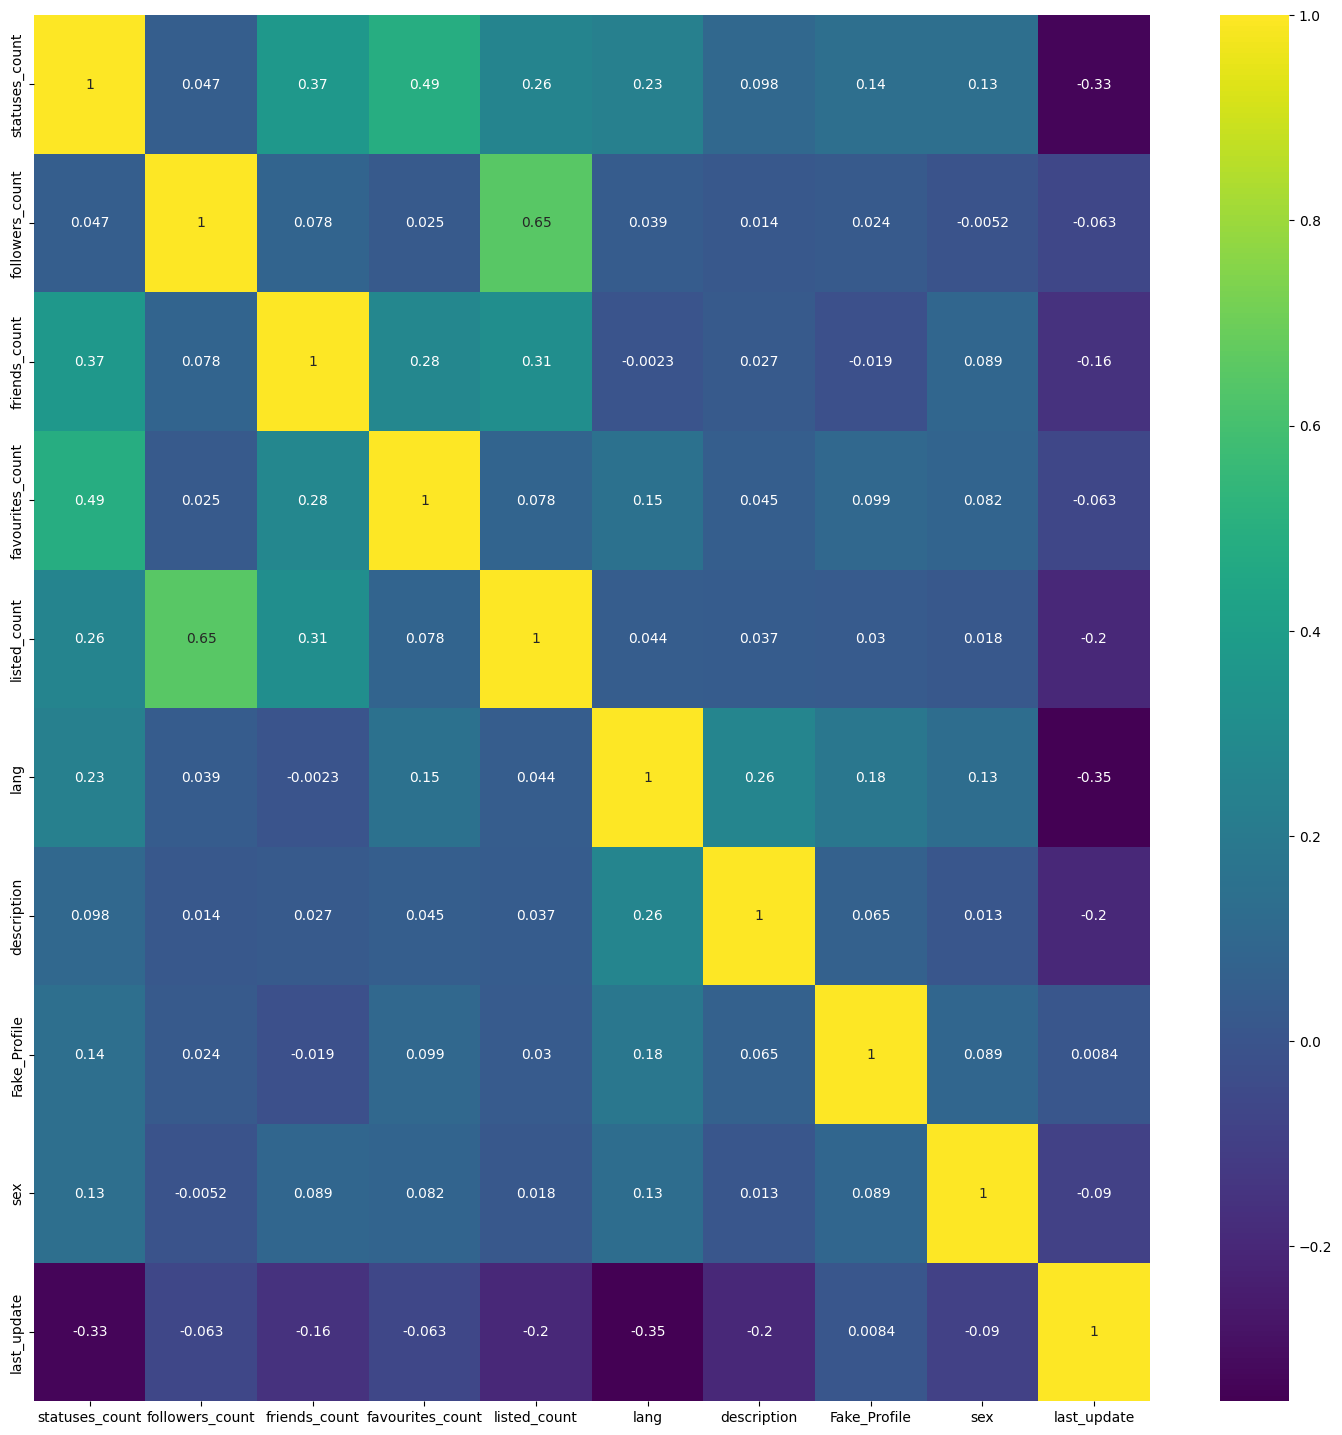

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(dataset.corr(), annot = True, cmap = 'viridis')

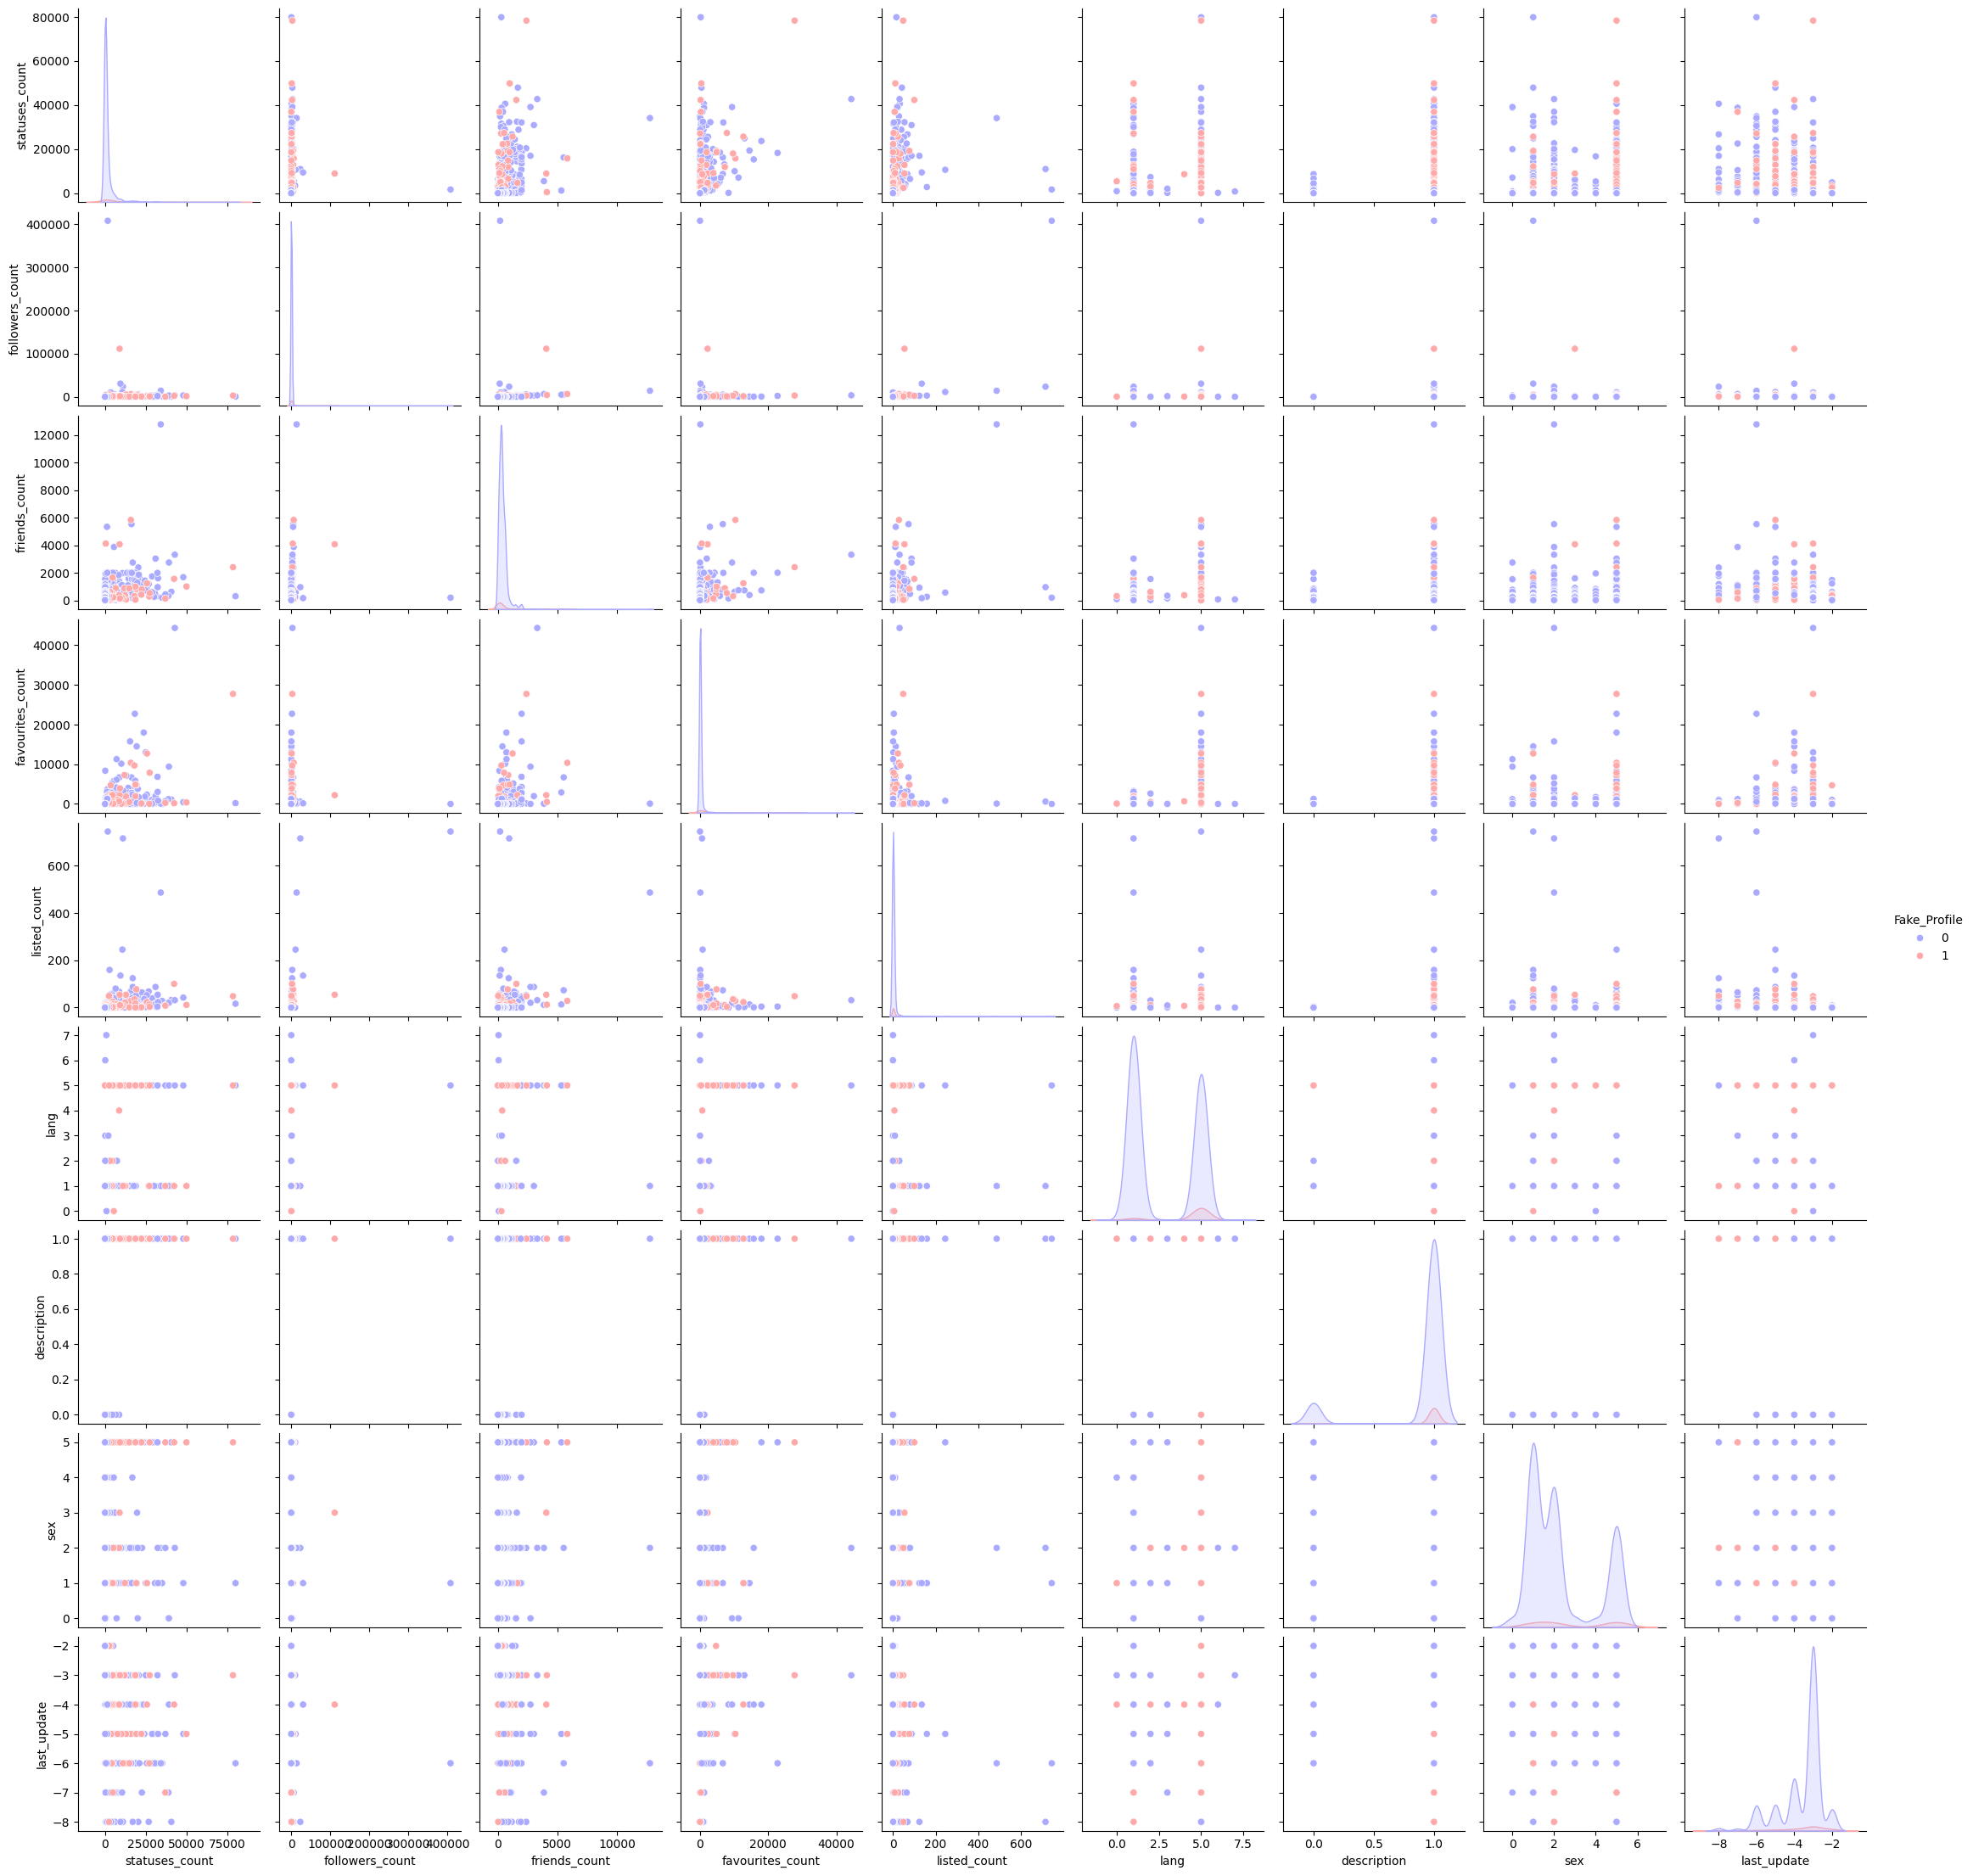

In [394]:
sns.pairplot(dataset,hue='Fake_Profile',palette='bwr')

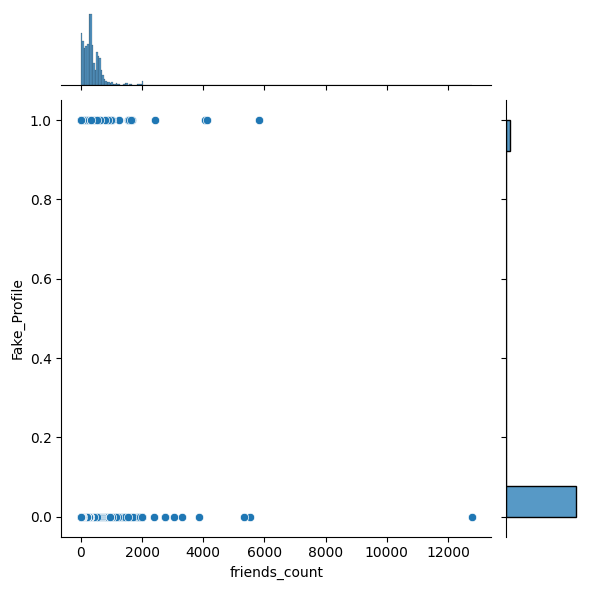

In [395]:
sns.jointplot(x='friends_count',y='Fake_Profile',data=dataset)

In [396]:
dataset.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'lang', 'description',
       'Fake_Profile', 'sex', 'last_update'],
      dtype='object')

In [ ]:
# Select features and target variable
X = dataset[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 
             'listed_count', 'lang', 'sex', 'last_update']]
y = dataset['Fake_Profile']

# Handle missing values (fill with mean for simplicity)
X = X.fillna(X.mean())

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
joblib.dump(scaler, 'model/scaler.pkl') 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Corrected input_dim
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20


d:\program files\python3.9.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8207 - loss: 0.5089 - val_accuracy: 0.9534 - val_loss: 0.2255
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9416 - loss: 0.2647 - val_accuracy: 0.9534 - val_loss: 0.1823
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9428 - loss: 0.2338 - val_accuracy: 0.9534 - val_loss: 0.1712
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9468 - loss: 0.2180 - val_accuracy: 0.9534 - val_loss: 0.1643
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9485 - loss: 0.1811 - val_accuracy: 0.9534 - val_loss: 0.1614
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9605 - loss: 0.1735 - val_accuracy: 0.9534 - val_loss: 0.1596
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9444 - loss: 0.2009 - val_accuracy: 0.9534 - val_loss: 0.1582
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9442 - loss: 0.1852 - val_accuracy: 0.9534 - val_loss: 0.1568
Epo

In [398]:

# Evaluate the model
evaluation = model.evaluate(X_test, y_test, verbose=0)

In [399]:
model.save('model/fake_account_detection_model.h5')
# keras.saving.save_model(model,'fake_account_detection_model.h5')

In [401]:
print("Test Accuracy:", evaluation[1]*100)

Test Accuracy: 94.85815763473511
